# 1-1,ÁªìÊûÑÂåñÊï∞ÊçÆÂª∫Ê®°ÊµÅÁ®ãËåÉ‰æã

In [114]:
import os

#macÁ≥ªÁªü‰∏äpytorchÂíåmatplotlibÂú®jupyter‰∏≠ÂêåÊó∂Ë∑ëÈúÄË¶ÅÊõ¥ÊîπÁéØÂ¢ÉÂèòÈáè
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 


In [115]:
!pip install torch==2.0.0
!pip install -U torchkeras

You should consider upgrading via the 'c:\users\pengche1\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: torchkeras in c:\users\pengche1\appdata\local\programs\python\python39\lib\site-packages (3.9.6)


You should consider upgrading via the 'c:\users\pengche1\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [116]:
import torch 
import torchkeras 
print("torch.__version__ = ", torch.__version__)
print("torchkeras.__version__ = ", torchkeras.__version__) 

torch.__version__ =  2.0.0+cpu
torchkeras.__version__ =  3.9.6


<br>

<font color="red">
 
ÂÖ¨‰ºóÂè∑ **ÁÆóÊ≥ïÁæéÈ£üÂ±ã** ÂõûÂ§çÂÖ≥ÈîÆËØçÔºö**pytorch**Ôºå Ëé∑ÂèñÊú¨È°πÁõÆÊ∫êÁ†ÅÂíåÊâÄÁî®Êï∞ÊçÆÈõÜÁôæÂ∫¶‰∫ëÁõò‰∏ãËΩΩÈìæÊé•„ÄÇ
    
</font> 


### ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

titanicÊï∞ÊçÆÈõÜÁöÑÁõÆÊ†áÊòØÊ†πÊçÆ‰πòÂÆ¢‰ø°ÊÅØÈ¢ÑÊµã‰ªñ‰ª¨Âú®TitanicÂè∑ÊíûÂáªÂÜ∞Â±±Ê≤âÊ≤°ÂêéËÉΩÂê¶ÁîüÂ≠ò„ÄÇ

ÁªìÊûÑÂåñÊï∞ÊçÆ‰∏ÄËà¨‰ºö‰ΩøÁî®Pandas‰∏≠ÁöÑDataFrameËøõË°åÈ¢ÑÂ§ÑÁêÜ„ÄÇ


In [117]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader,TensorDataset

dftrain_raw = pd.read_csv('./eat_pytorch_datasets/titanic/train.csv')
dftest_raw = pd.read_csv('./eat_pytorch_datasets/titanic/test.csv')
dftrain_raw.head(10)


PassengerId  Survived  Pclass  \
0          493         0       1   
1           53         1       1   
2          388         1       2   
3          192         0       2   
4          687         0       3   
5           16         1       2   
6          228         0       3   
7          884         0       2   
8          168         0       3   
9          752         1       3   

                                              Name     Sex   Age  SibSp  \
0                       Molson, Mr. Harry Markland    male  55.0      0   
1         Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
2                                 Buss, Miss. Kate  female  36.0      0   
3                            Carbines, Mr. William    male  19.0      0   
4                         Panula, Mr. Jaako Arnold    male  14.0      4   
5                 Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
6                  Lovell, Mr. John Hall ("Henry")    male  20.5      0   
7                    Banfield, Mr. Frederick James    male  28.0      0   
8  Skoog, Mrs. William (Anna Bernhardina Karlsson)  female  45.0      1   
9                              Moor, Master. Meier    male   6.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0            113787  30.5000   C30        S  
1      0          PC 17572  76.7292   D33        C  
2      0             27849  13.0000   NaN        S  
3      0             28424  13.0000   NaN        S  
4      1           3101295  39.6875   NaN        S  
5      0            248706  16.0000   NaN        S  
6      0         A/5 21173   7.2500   NaN        S  
7      0  C.A./SOTON 34068  10.5000   NaN        S  
8      4            347088  27.9000   NaN        S  
9      1            392096  12.4750  E121        S

Â≠óÊÆµËØ¥ÊòéÔºö

* Survived:0‰ª£Ë°®Ê≠ª‰∫°Ôºå1‰ª£Ë°®Â≠òÊ¥ª„ÄêyÊ†áÁ≠æ„Äë
* Pclass:‰πòÂÆ¢ÊâÄÊåÅÁ•®Á±ªÔºåÊúâ‰∏âÁßçÂÄº(1,2,3) „ÄêËΩ¨Êç¢ÊàêonehotÁºñÁ†Å„Äë
* Name:‰πòÂÆ¢ÂßìÂêç „ÄêËàçÂéª„Äë
* Sex:‰πòÂÆ¢ÊÄßÂà´ „ÄêËΩ¨Êç¢ÊàêboolÁâπÂæÅ„Äë
* Age:‰πòÂÆ¢Âπ¥ÈæÑ(ÊúâÁº∫Â§±) „ÄêÊï∞ÂÄºÁâπÂæÅÔºåÊ∑ªÂä†‚ÄúÂπ¥ÈæÑÊòØÂê¶Áº∫Â§±‚Äù‰Ωú‰∏∫ËæÖÂä©ÁâπÂæÅ„Äë
* SibSp:‰πòÂÆ¢ÂÖÑÂºüÂßêÂ¶π/ÈÖçÂÅ∂ÁöÑ‰∏™Êï∞(Êï¥Êï∞ÂÄº) „ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Parch:‰πòÂÆ¢Áà∂ÊØç/Â≠©Â≠êÁöÑ‰∏™Êï∞(Êï¥Êï∞ÂÄº)„ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Ticket:Á•®Âè∑(Â≠óÁ¨¶‰∏≤)„ÄêËàçÂéª„Äë
* Fare:‰πòÂÆ¢ÊâÄÊåÅÁ•®ÁöÑ‰ª∑Ê†º(ÊµÆÁÇπÊï∞Ôºå0-500‰∏çÁ≠â) „ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Cabin:‰πòÂÆ¢ÊâÄÂú®ËàπËà±(ÊúâÁº∫Â§±) „ÄêÊ∑ªÂä†‚ÄúÊâÄÂú®ËàπËà±ÊòØÂê¶Áº∫Â§±‚Äù‰Ωú‰∏∫ËæÖÂä©ÁâπÂæÅ„Äë
* Embarked:‰πòÂÆ¢ÁôªËàπÊ∏ØÂè£:S„ÄÅC„ÄÅQ(ÊúâÁº∫Â§±)„ÄêËΩ¨Êç¢ÊàêonehotÁºñÁ†ÅÔºåÂõõÁª¥Â∫¶ S,C,Q,nan„Äë


Âà©Áî®PandasÁöÑÊï∞ÊçÆÂèØËßÜÂåñÂäüËÉΩÊàë‰ª¨ÂèØ‰ª•ÁÆÄÂçïÂú∞ËøõË°åÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêEDAÔºàExploratory Data AnalysisÔºâ„ÄÇ

labelÂàÜÂ∏ÉÊÉÖÂÜµ

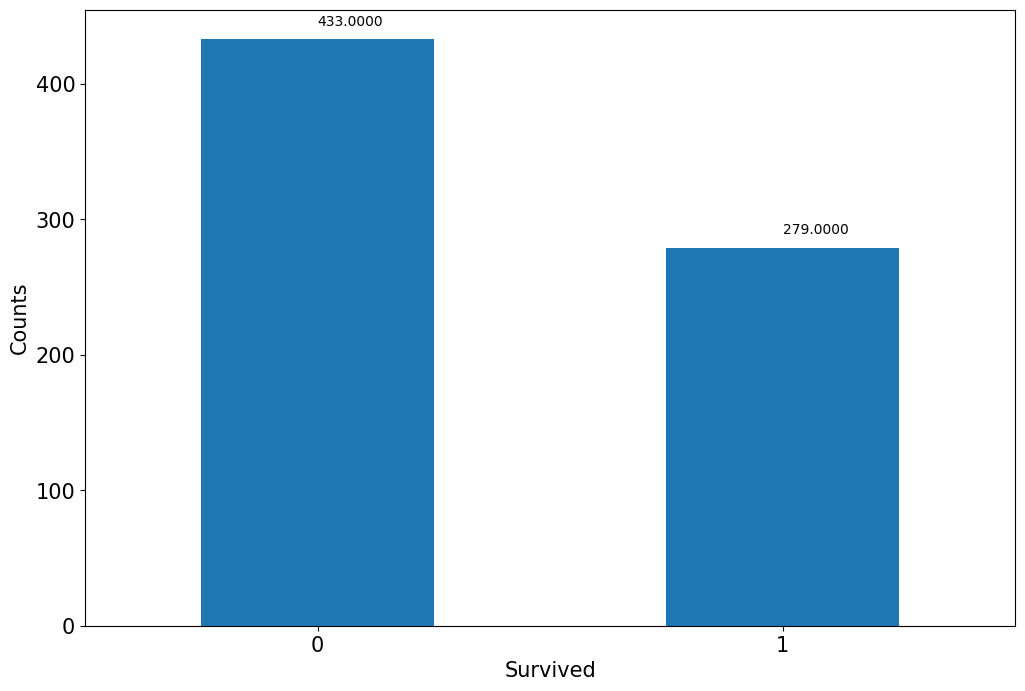

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
for a,b in zip([0,1],list(dftrain_raw['Survived'].value_counts())):
    plt.text(a,b +10,'%.4f' %b)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()


Âπ¥ÈæÑÂàÜÂ∏ÉÊÉÖÂÜµ

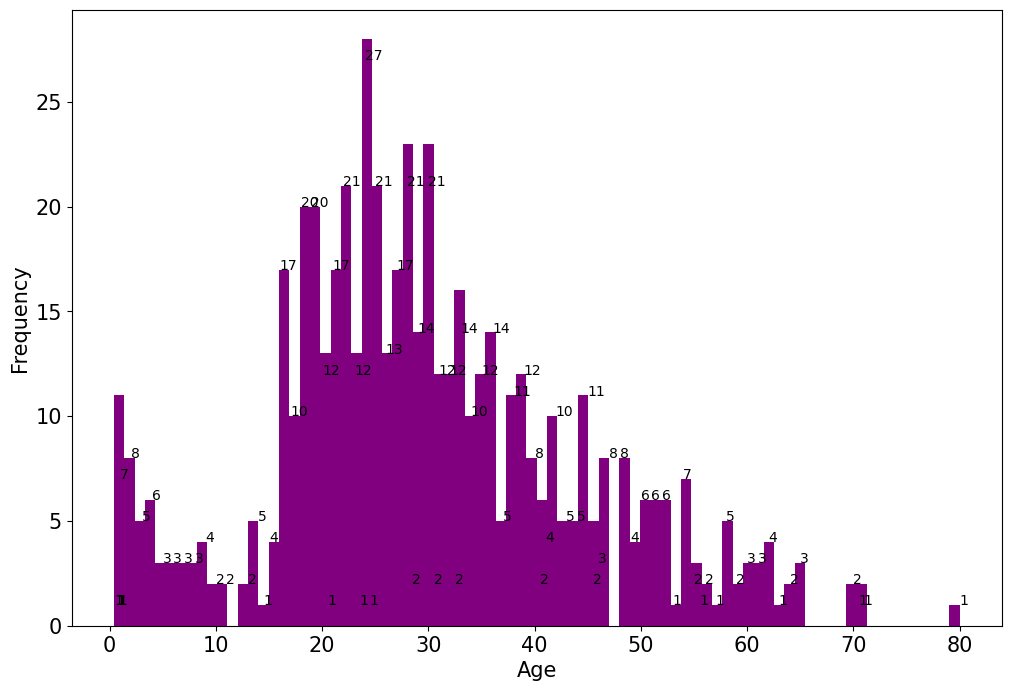

In [119]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 82,color= 'purple',
                    figsize = (12,8),fontsize=15)
for a,b in dftrain_raw['Age'].value_counts().items():
    plt.text(a,b,b)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()


Âπ¥ÈæÑÂíålabelÁöÑÁõ∏ÂÖ≥ÊÄß

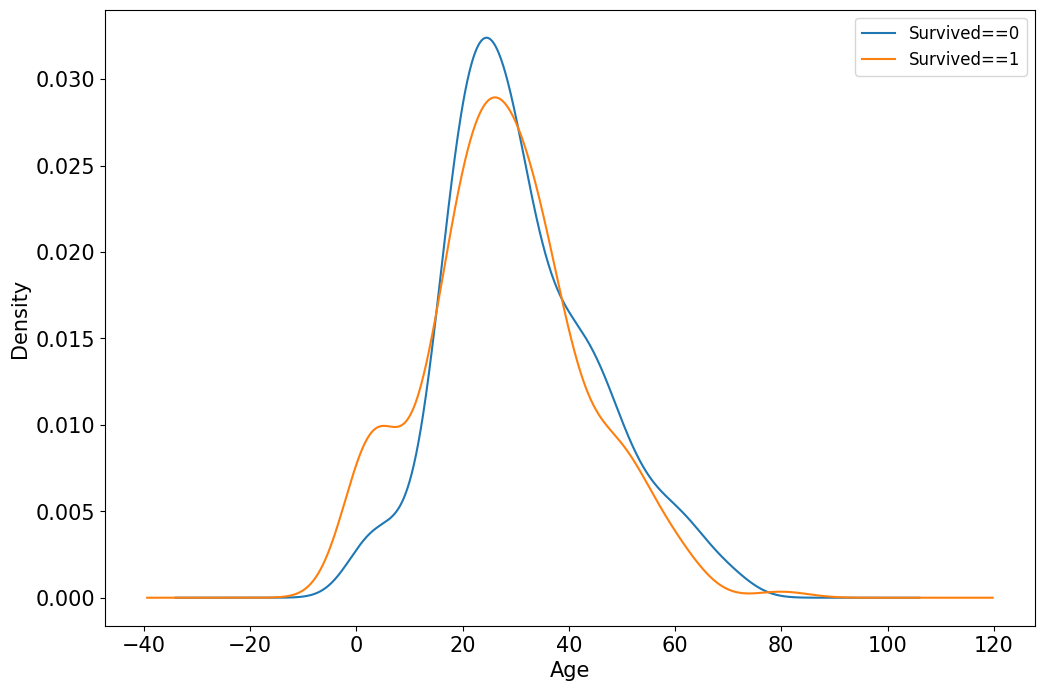

In [120]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

‰∏ãÈù¢‰∏∫Ê≠£ÂºèÁöÑÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [121]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw).values
y_train = dftrain_raw[['Survived']].values

x_test = preprocessing(dftest_raw).values
y_test = dftest_raw[['Survived']].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

print("y_train.shape =", y_train.shape )
print("y_test.shape =", y_test.shape )


x_train.shape = (712, 15)
x_test.shape = (179, 15)
y_train.shape = (712, 1)
y_test.shape = (179, 1)


Ëøõ‰∏ÄÊ≠•‰ΩøÁî®DataLoaderÂíåTensorDatasetÂ∞ÅË£ÖÊàêÂèØ‰ª•Ëø≠‰ª£ÁöÑÊï∞ÊçÆÁÆ°ÈÅì„ÄÇ

In [122]:

dl_train = DataLoader(TensorDataset(torch.tensor(x_train.astype(float)).float(),torch.tensor(y_train).float()),
                     shuffle = True, batch_size = 8)
dl_val = DataLoader(TensorDataset(torch.tensor(x_test.astype(float)).float(),torch.tensor(y_test).float()),
                     shuffle = False, batch_size = 8)


In [123]:
# ÊµãËØïÊï∞ÊçÆÁÆ°ÈÅì
for features,labels in dl_train:
    print(features,labels)
    break

tensor([[ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 26.0000,  0.0000,  0.0000,
          0.0000,  7.8958,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000, 21.0000,  0.0000,  0.0000,
          0.0000, 10.5000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000, 17.0000,  0.0000,  0.0000,
          0.0000, 10.5000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 20.0000,  0.0000,  0.0000,
          0.0000,  9.2250,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 42.0000,  0.0000,  0.0000,
          0.0000, 26.2875,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 31.0000,  0.0000,  0.0

### ‰∫åÔºåÂÆö‰πâÊ®°Âûã

‰ΩøÁî®PytorchÈÄöÂ∏∏Êúâ‰∏âÁßçÊñπÂºèÊûÑÂª∫Ê®°ÂûãÔºö‰ΩøÁî®nn.SequentialÊåâÂ±ÇÈ°∫Â∫èÊûÑÂª∫Ê®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ëá™ÂÆö‰πâÊ®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ê®°ÂûãÂπ∂ËæÖÂä©Â∫îÁî®Ê®°ÂûãÂÆπÂô®ËøõË°åÂ∞ÅË£Ö„ÄÇ

Ê≠§Â§ÑÈÄâÊã©‰ΩøÁî®ÊúÄÁÆÄÂçïÁöÑnn.SequentialÔºåÊåâÂ±ÇÈ°∫Â∫èÊ®°Âûã„ÄÇ

In [124]:
def create_net():
    net = nn.Sequential()
    net.add_module("linear1",nn.Linear(15,20))
    net.add_module("relu1",nn.ReLU())
    net.add_module("linear2",nn.Linear(20,15))
    net.add_module("relu2",nn.ReLU())
    net.add_module("linear3",nn.Linear(15,1))
    return net
    
net = create_net()
print(net)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
)


### ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

PytorchÈÄöÂ∏∏ÈúÄË¶ÅÁî®Êà∑ÁºñÂÜôËá™ÂÆö‰πâËÆ≠ÁªÉÂæ™ÁéØÔºåËÆ≠ÁªÉÂæ™ÁéØÁöÑ‰ª£Á†ÅÈ£éÊ†ºÂõ†‰∫∫ËÄåÂºÇ„ÄÇ

Êúâ3Á±ªÂÖ∏ÂûãÁöÑËÆ≠ÁªÉÂæ™ÁéØ‰ª£Á†ÅÈ£éÊ†ºÔºöËÑöÊú¨ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÂáΩÊï∞ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÁ±ªÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

Ê≠§Â§Ñ‰ªãÁªç‰∏ÄÁßçËæÉÈÄöÁî®ÁöÑ‰ªøÁÖßKerasÈ£éÊ†ºÁöÑËÑöÊú¨ÂΩ¢ÂºèÁöÑËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

ËØ•ËÑöÊú¨ÂΩ¢ÂºèÁöÑËÆ≠ÁªÉ‰ª£Á†Å‰∏é torchkeras Â∫ìÁöÑÊ†∏ÂøÉ‰ª£Á†ÅÂü∫Êú¨‰∏ÄËá¥„ÄÇ

torchkerasËØ¶ÊÉÖ:  https://github.com/lyhue1991/torchkeras 


In [125]:
import os,sys,time
import numpy as np
import pandas as pd
import datetime 
from tqdm import tqdm 

import torch
from torch import nn 
from copy import deepcopy
from torchkeras.metrics import Accuracy


def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    print(str(info)+"\n")
    

loss_fn = nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters(),lr = 0.01)   
metrics_dict = {"acc":Accuracy()}

epochs = 20 
ckpt_path='checkpoint.pt'

#early_stoppingÁõ∏ÂÖ≥ËÆæÁΩÆ
monitor="val_acc"
patience=5
mode="max"

history = {}

for epoch in range(1, epochs+1):
    printlog("Epoch {0} / {1}".format(epoch, epochs))

    # 1Ôºåtrain -------------------------------------------------  
    net.train()
    
    total_loss,step = 0,0
    
    loop = tqdm(enumerate(dl_train), total =len(dl_train),file = sys.stdout)
    train_metrics_dict = deepcopy(metrics_dict) 
    
    for i, batch in loop: 
        
        features,labels = batch
        #forward
        preds = net(features)
        loss = loss_fn(preds,labels)
        
        #backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
            
        #metrics
        step_metrics = {"train_"+name:metric_fn(preds, labels).item() 
                        for name,metric_fn in train_metrics_dict.items()}
        
        step_log = dict({"train_loss":loss.item()},**step_metrics)

        total_loss += loss.item()
        
        step+=1
        if i!=len(dl_train)-1:
            loop.set_postfix(**step_log)
        else:
            epoch_loss = total_loss/step
            epoch_metrics = {"train_"+name:metric_fn.compute().item() 
                             for name,metric_fn in train_metrics_dict.items()}
            epoch_log = dict({"train_loss":epoch_loss},**epoch_metrics)
            loop.set_postfix(**epoch_log)

            for name,metric_fn in train_metrics_dict.items():
                metric_fn.reset()
                
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]
        

    # 2Ôºåvalidate -------------------------------------------------
    net.eval()
    
    total_loss,step = 0,0
    loop = tqdm(enumerate(dl_val), total =len(dl_val),file = sys.stdout)
    
    val_metrics_dict = deepcopy(metrics_dict) 
    
    with torch.no_grad():
        for i, batch in loop: 

            features,labels = batch
            
            #forward
            preds = net(features)
            loss = loss_fn(preds,labels)

            #metrics
            step_metrics = {"val_"+name:metric_fn(preds, labels).item() 
                            for name,metric_fn in val_metrics_dict.items()}

            step_log = dict({"val_loss":loss.item()},**step_metrics)

            total_loss += loss.item()
            step+=1
            if i!=len(dl_val)-1:
                loop.set_postfix(**step_log)
            else:
                epoch_loss = (total_loss/step)
                epoch_metrics = {"val_"+name:metric_fn.compute().item() 
                                 for name,metric_fn in val_metrics_dict.items()}
                epoch_log = dict({"val_loss":epoch_loss},**epoch_metrics)
                loop.set_postfix(**epoch_log)

                for name,metric_fn in val_metrics_dict.items():
                    metric_fn.reset()
                    
    epoch_log["epoch"] = epoch           
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 3Ôºåearly-stopping -------------------------------------------------
    arr_scores = history[monitor]
    best_score_idx = np.argmax(arr_scores) if mode=="max" else np.argmin(arr_scores)
    if best_score_idx==len(arr_scores)-1:
        torch.save(net.state_dict(),ckpt_path)
        print("<<<<<< reach best {0} : {1} >>>>>>".format(monitor,
             arr_scores[best_score_idx]),file=sys.stderr)
    if len(arr_scores)-best_score_idx>patience:
        print("<<<<<< {} without improvement in {} epoch, early stopping >>>>>>".format(
            monitor,patience),file=sys.stderr)
        break 
    net.load_state_dict(torch.load(ckpt_path))
    
dfhistory = pd.DataFrame(history)



================================================================================2024-02-21 06:25:44
Epoch 1 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 798.68it/s, val_acc=0.698, val_loss=0.633]

<<<<<< reach best val_acc : 0.6983240246772766 >>>>>>




================================================================================2024-02-21 06:25:44
Epoch 2 / 20

  0%|          | 0/89 [00:00<?, ?it/s, train_acc=0.875, train_loss=0.493]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1103.54it/s, val_acc=0.693, val_loss=0.562]

================================================================================2024-02-21 06:25:44
Epoch 3 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 637.87it/s, val_acc=0.721, val_loss=0.51]

<<<<<< reach best val_acc : 0.7206704020500183 >>>>>>




================================================================================2024-02-21 06:25:45
Epoch 4 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1472.43it/s, val_acc=0.765, val_loss=0.476]

<<<<<< reach best val_acc : 0.7653631567955017 >>>>>>




================================================================================2024-02-21 06:25:45
Epoch 5 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 724.65it/s, val_acc=0.732, val_loss=0.515]

================================================================================2024-02-21 06:25:45
Epoch 6 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1428.60it/s, val_acc=0.749, val_loss=0.481]

================================================================================2024-02-21 06:25:45
Epoch 7 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1768.13it/s, val_acc=0.777, val_loss=0.43]


<<<<<< reach best val_acc : 0.7765362858772278 >>>>>>



================================================================================2024-02-21 06:25:45
Epoch 8 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 886.00it/s, val_acc=0.765, val_loss=0.479]

================================================================================2024-02-21 06:25:46
Epoch 9 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 762.72it/s, val_acc=0.777, val_loss=0.456]

================================================================================2024-02-21 06:25:46
Epoch 10 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1454.25it/s, val_acc=0.788, val_loss=0.483]

<<<<<< reach best val_acc : 0.7877094745635986 >>>>>>




================================================================================2024-02-21 06:25:46
Epoch 11 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1585.31it/s, val_acc=0.749, val_loss=0.494]

================================================================================2024-02-21 06:25:46
Epoch 12 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 1088.63it/s, val_acc=0.765, val_loss=0.456]

================================================================================2024-02-21 06:25:46
Epoch 13 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 734.36it/s, val_acc=0.799, val_loss=0.437]

<<<<<< reach best val_acc : 0.7988826632499695 >>>>>>




================================================================================2024-02-21 06:25:46
Epoch 14 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 597.46it/s, val_acc=0.788, val_loss=0.432]

================================================================================2024-02-21 06:25:47
Epoch 15 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 734.15it/s, val_acc=0.799, val_loss=0.436]

================================================================================2024-02-21 06:25:47
Epoch 16 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 731.32it/s, val_acc=0.793, val_loss=0.467]

================================================================================2024-02-21 06:25:47
Epoch 17 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 588.02it/s, val_acc=0.788, val_loss=0.422]

================================================================================2024-02-21 06:25:47
Epoch 18 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñ

<<<<<< reach best val_acc : 0.8100558519363403 >>>>>>




================================================================================2024-02-21 06:25:48
Epoch 19 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 728.22it/s, val_acc=0.793, val_loss=0.422]

================================================================================2024-02-21 06:25:48
Epoch 20 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 733.57it/s, val_acc=0.788, val_loss=0.45]


### ÂõõÔºåËØÑ‰º∞Ê®°Âûã

Êàë‰ª¨È¶ñÂÖàËØÑ‰º∞‰∏Ä‰∏ãÊ®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ‰∏äÁöÑÊïàÊûú„ÄÇ

In [126]:
dfhistory 

train_loss  train_acc  val_loss   val_acc  epoch
0     0.684502   0.660112  0.633248  0.698324      1
1     0.584112   0.693820  0.561694  0.692737      2
2     0.594465   0.689607  0.509903  0.720670      3
3     0.562312   0.740169  0.476214  0.765363      4
4     0.530940   0.747191  0.514607  0.731844      5
5     0.516357   0.786517  0.481463  0.748603      6
6     0.493551   0.768258  0.430170  0.776536      7
7     0.515550   0.780899  0.479226  0.765363      8
8     0.478977   0.792135  0.456128  0.776536      9
9     0.523794   0.779494  0.483417  0.787709     10
10    0.504568   0.783708  0.493894  0.748603     11
11    0.539495   0.761236  0.456483  0.765363     12
12    0.490317   0.782303  0.437278  0.798883     13
13    0.462121   0.796348  0.432220  0.787709     14
14    0.469958   0.801966  0.436046  0.798883     15
15    0.477884   0.799157  0.466706  0.793296     16
16    0.464116   0.800562  0.422169  0.787709     17
17    0.484153   0.790730  0.450122  0.810056     18
18    0.464389   0.806180  0.421545  0.793296     19
19    0.475652   0.806180  0.450479  0.787709     20

In [127]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

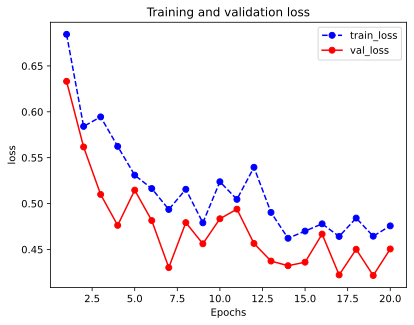

In [128]:
plot_metric(dfhistory,"loss")

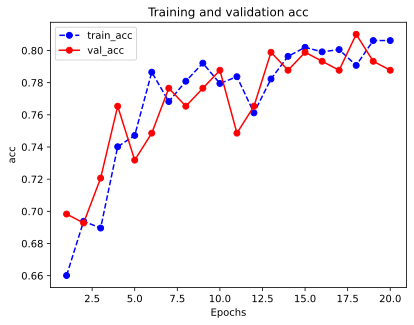

In [129]:
plot_metric(dfhistory,"acc")

### ‰∫îÔºå‰ΩøÁî®Ê®°Âûã

In [130]:
#È¢ÑÊµãÊ¶ÇÁéá

y_pred_probs = torch.sigmoid(net(torch.tensor(x_test[0:10].astype(float)).float())).data
y_pred_probs

tensor([[0.1153],
        [0.6210],
        [0.4227],
        [0.9626],
        [0.5617],
        [0.7712],
        [0.1597],
        [0.8284],
        [0.5700],
        [0.2043]])

In [131]:
#È¢ÑÊµãÁ±ªÂà´
y_pred = torch.where(y_pred_probs>0.5,
        torch.ones_like(y_pred_probs),torch.zeros_like(y_pred_probs))
y_pred

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

### ÂÖ≠Ôºå‰øùÂ≠òÊ®°Âûã

Pytorch Êúâ‰∏§Áßç‰øùÂ≠òÊ®°ÂûãÁöÑÊñπÂºèÔºåÈÉΩÊòØÈÄöËøáË∞ÉÁî®pickleÂ∫èÂàóÂåñÊñπÊ≥ïÂÆûÁé∞ÁöÑ„ÄÇ

Á¨¨‰∏ÄÁßçÊñπÊ≥ïÂè™‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞„ÄÇ

Á¨¨‰∫åÁßçÊñπÊ≥ï‰øùÂ≠òÂÆåÊï¥Ê®°Âûã„ÄÇ

Êé®Ëçê‰ΩøÁî®Á¨¨‰∏ÄÁßçÔºåÁ¨¨‰∫åÁßçÊñπÊ≥ïÂèØËÉΩÂú®ÂàáÊç¢ËÆæÂ§áÂíåÁõÆÂΩïÁöÑÊó∂ÂÄôÂá∫Áé∞ÂêÑÁßçÈóÆÈ¢ò„ÄÇ


**1Ôºå‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞(Êé®Ëçê)**

In [132]:
print(net.state_dict().keys())


odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [133]:
# ‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞

torch.save(net.state_dict(), "./data/net_parameter.pt")

net_clone = create_net()
net_clone.load_state_dict(torch.load("./data/net_parameter.pt"))

torch.sigmoid(net_clone.forward(torch.tensor(x_test[0:10].astype(float)).float())).data


tensor([[0.1153],
        [0.6210],
        [0.4227],
        [0.9626],
        [0.5617],
        [0.7712],
        [0.1597],
        [0.8284],
        [0.5700],
        [0.2043]])

**2Ôºå‰øùÂ≠òÂÆåÊï¥Ê®°Âûã(‰∏çÊé®Ëçê)**

In [134]:
torch.save(net, './data/net_model.pt')
net_loaded = torch.load('./data/net_model.pt')
torch.sigmoid(net_loaded(torch.tensor(x_test[0:10].astype(float)).float())).data


tensor([[0.1153],
        [0.6210],
        [0.4227],
        [0.9626],
        [0.5617],
        [0.7712],
        [0.1597],
        [0.8284],
        [0.5700],
        [0.2043]])

**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)